In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('..')
import absorption_line_vel as vel
from absorption_line_vel import SpectrumSN_Lines, AbsorbLine

# read spec data
z = 0.0307
spec = '../../spectroscopy/ZTF20aayhacx_20200529_Lick_3-m_v1.ascii'
Spec1 = SpectrumSN_Lines(spec, z)
Spec = SpectrumSN_Lines(spec, 0)

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.size'] = '25'
mpl.rcParams['xtick.labelsize'] = '20'
mpl.rcParams['ytick.labelsize'] = '20'

# 20200529_Lick_3-m

## Na 5890 & 5896

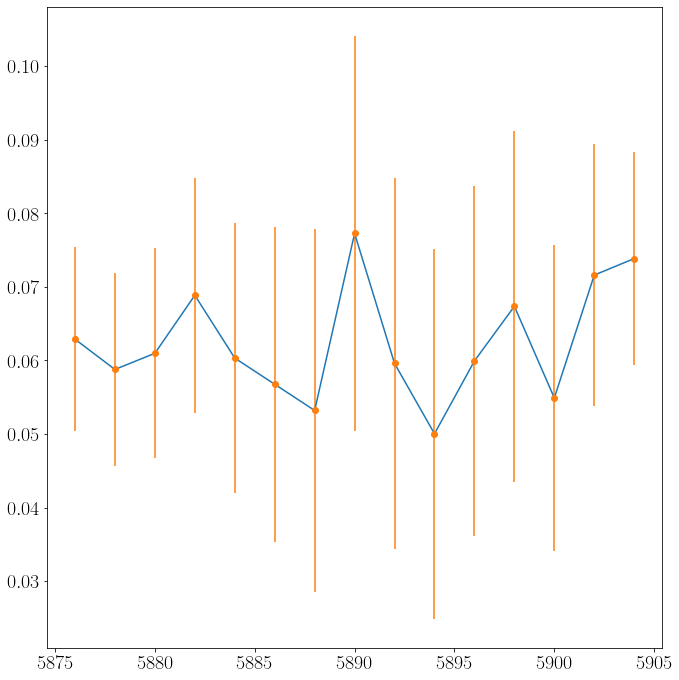

In [3]:
Spec.plot_line_region(5875, 5905)

In [17]:
Spec.add_line('NaI_5896', 5880, 5900, lines=[5889.950, 5895.924], rel_strength=[2, 1])

9 points within 5880.00 and 5900.00 angstroms.


../absorption_line_vel.py:145: UserWarning: Too few points within the wavelength range!
  warnings.warn('Too few points within the wavelength range!')


 24%|██▍       | 4750/20000 [02:25<07:46, 32.70it/s]


MCMC results:
Velocity pvf: -145 pm 92 km/s


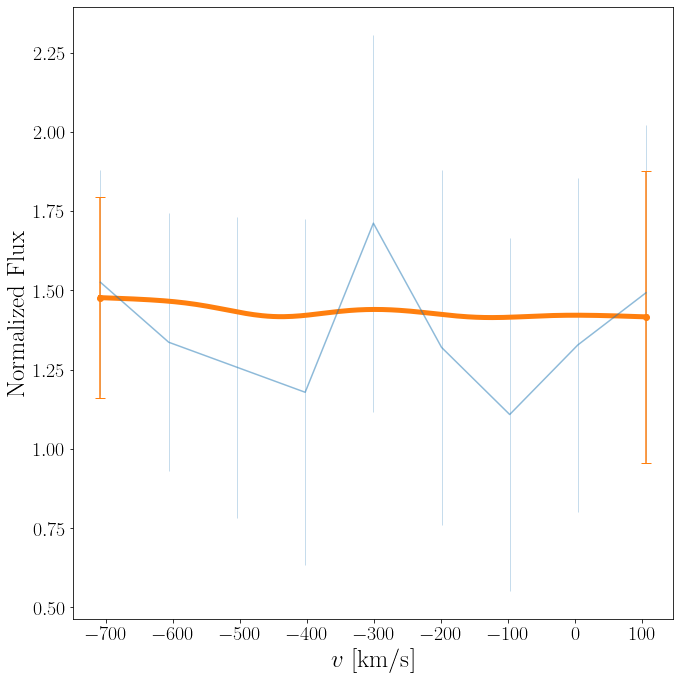

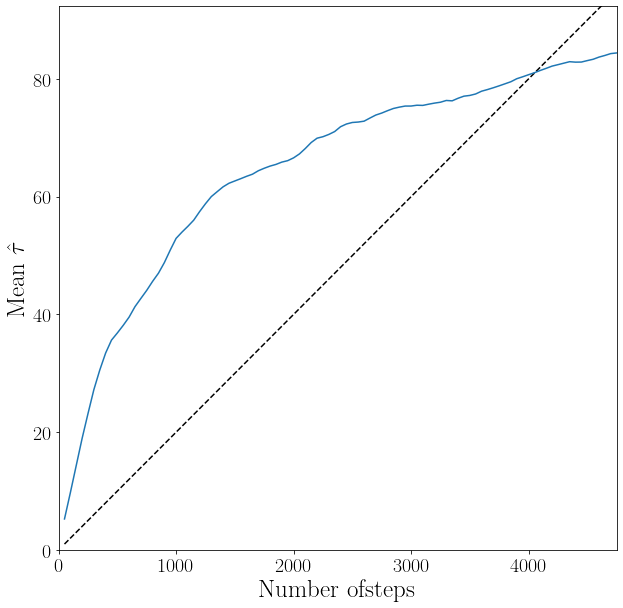

In [27]:
'''sampler = Spec.line['NaI_5896'].MCMC_sampler(initial=[1, 1, -100, 3, -5],
                                             normalize_unc=False,
                                             max_nsteps=1000)'''

sampler = Spec.line['NaI_5896'].MCMC_sampler(
    #initial=Spec.line['NaI_5896'].theta_MCMC,
    initial=[1, 1, -100, 8, -5],
    normalize_unc=False,
    #Plot_mcmc=True,
    max_nsteps=20000,
    Plot_tau=True)

In [28]:
sample = sampler.get_chain(discard=800, flat=True, thin=1)
logprob = sampler.get_log_prob(discard=800, flat=True, thin=1)

Na = Spec.line['NaI_5896']
ratio = 2 / (Na.red_vel - Na.blue_vel) / (Na.red_fl[0]+Na.blue_fl[0])*\
            (Na.wv_line[-1] - Na.wv_line[0]) * np.sum(Na.rel_strength) * 1000
sig = np.exp(sample[:, -2] / 2)
EW = sample[:, -1] * -ratio
p1 = np.percentile(EW, 68)
p2 = np.percentile(EW, 95)

In [29]:
EBV1 = lambda EW: (2.47 * EW / 1000 - 1.76)
EBV2 = lambda EW: (2.16 * EW / 1000 - 1.91)
EBV = lambda EW: (1.17 * EW / 1000 - 1.85)

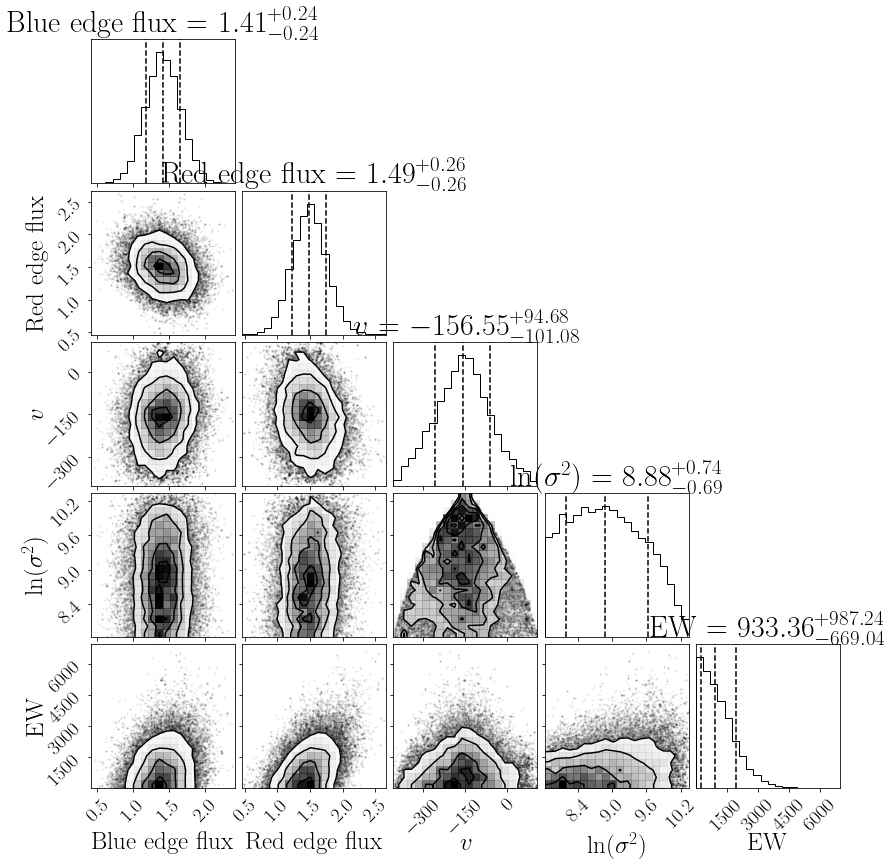

In [32]:
import corner
paramsNames = [
    r'$\mathrm{Blue\ edge\ flux}$', r'$\mathrm{Red\ edge\ flux}$', r'$v$',
    r'$\ln(\sigma^2)$', r'$\mathrm{EW}$'
]
chain = sample.copy()
chain[:, -1] = -ratio * sample[:, -1]
fig = corner.corner(chain[::8],
                    labels=paramsNames,
                    quantiles=[0.16, 0.50, 0.84],
                    show_titles=True)

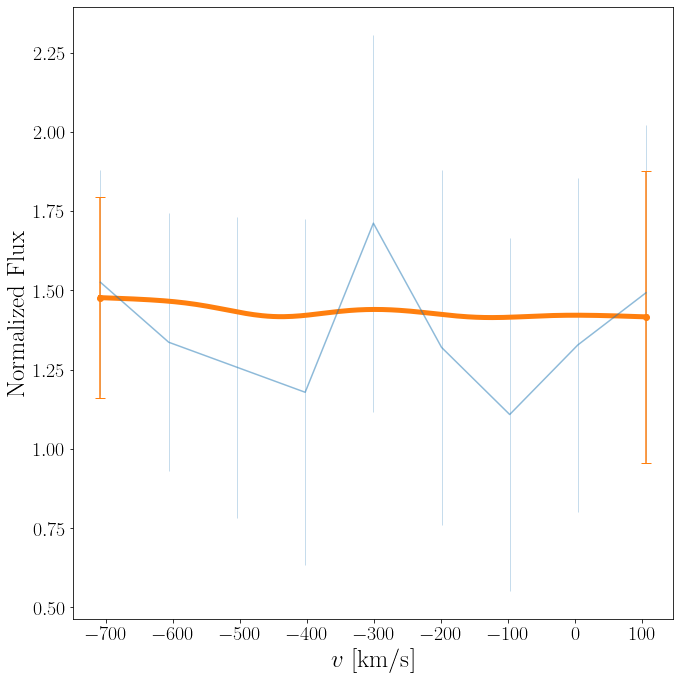

sigma = 72.3, EW = 89.5, E(B-V) = 0.018


In [33]:
the = Na.theta_MCMC
Na.plot_model(the)
print('sigma = {:.1f}, EW = {:.1f}, E(B-V) = {:.3f}'.format(
    np.exp(the[-2] / 2), -ratio * the[-1], 10**EBV(-ratio * the[-1])))

In [ ]:
the = Na.theta_MCMC
Na.plot_model(the)
print('sigma = {:.1f}, EW = {:.1f}, E(B-V) = {:.3f}'.format(
    np.exp(the[-2] / 2), -ratio * the[-1], 10**EBV(-ratio * the[-1])))

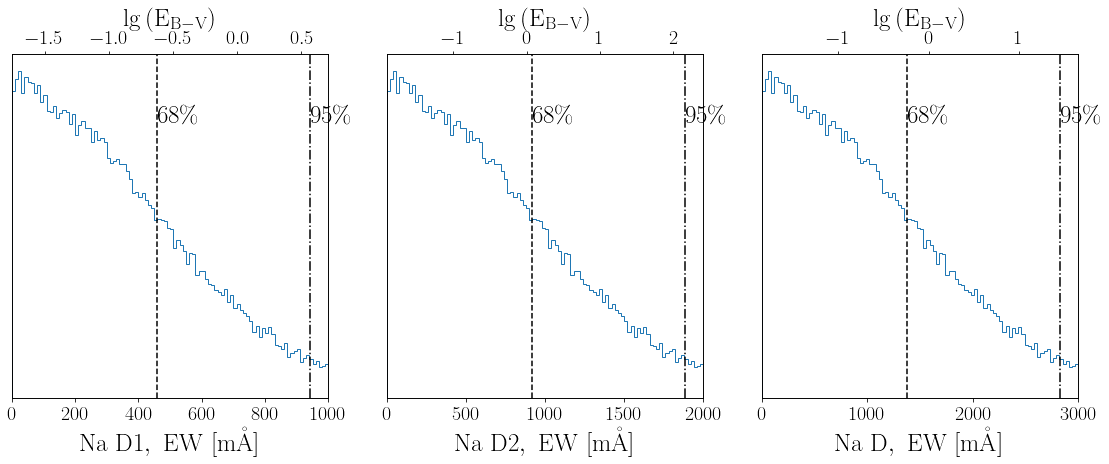

In [34]:
f, ax = plt.subplots(1, 3, figsize=(16, 7), sharey=True)
Range = 1000
ax[0].axvline(p1 / 3, color='k', linestyle='--')
ax[0].axvline(p2 / 3, color='k', linestyle='-.')
ax[0].text(p1 / 3 / Range, 0.8, r'$68\%$', transform=ax[0].transAxes)
ax[0].text(p2 / 3 / Range, 0.8, r'$95\%$', transform=ax[0].transAxes)
ax[0].hist(EW / 3, histtype='step', bins=100, range=[0, Range])
ax[0].set_xlabel(r'$\mathrm{Na\ D1,\ EW}\ [\mathrm{m\mathring{A}}]$')
ax02 = ax[0].twiny()
ax02.set_xlabel(r'$\lg\left(\mathrm{E_{\mathrm{B}-\mathrm{V}}}\right)$')
ax[0].set_xlim(0, Range)
ax02.set_xlim(EBV1(0), EBV1(Range))

ax[1].axvline(p1 * 2 / 3, color='k', linestyle='--')
ax[1].axvline(p2 * 2 / 3, color='k', linestyle='-.')
ax[1].text(p1 / 3 / Range, 0.8, r'$68\%$', transform=ax[1].transAxes)
ax[1].text(p2 / 3 / Range, 0.8, r'$95\%$', transform=ax[1].transAxes)
ax[1].hist(EW * 2 / 3, histtype='step', bins=100, range=[0, Range * 2])
ax[1].set_xlabel(r'$\mathrm{Na\ D2,\ EW}\ [\mathrm{m\mathring{A}}]$')
ax12 = ax[1].twiny()
ax12.set_xlabel(r'$\lg\left(\mathrm{E_{\mathrm{B}-\mathrm{V}}}\right)$')
ax[1].set_xlim(0, Range * 2)
ax12.set_xlim(EBV2(0), EBV2(Range * 2))

ax[2].axvline(p1, color='k', linestyle='--')
ax[2].axvline(p2, color='k', linestyle='-.')
ax[2].text(p1 / 3 / Range, 0.8, r'$68\%$', transform=ax[2].transAxes)
ax[2].text(p2 / 3 / Range, 0.8, r'$95\%$', transform=ax[2].transAxes)
ax[2].hist(EW, histtype='step', bins=100, range=[0, Range * 3])
ax[2].set_xlabel(r'$\mathrm{Na\ D,\ EW}\ [\mathrm{m\mathring{A}}]$')
ax22 = ax[2].twiny()
ax22.set_xlabel(r'$\lg\left(\mathrm{E_{\mathrm{B}-\mathrm{V}}}\right)$')
ax[2].set_xlim(0, Range * 3)
ax22.set_xlim(EBV(0), EBV(Range * 3))

ax[0].set_yticks([])
f.tight_layout()

## Si II 6355

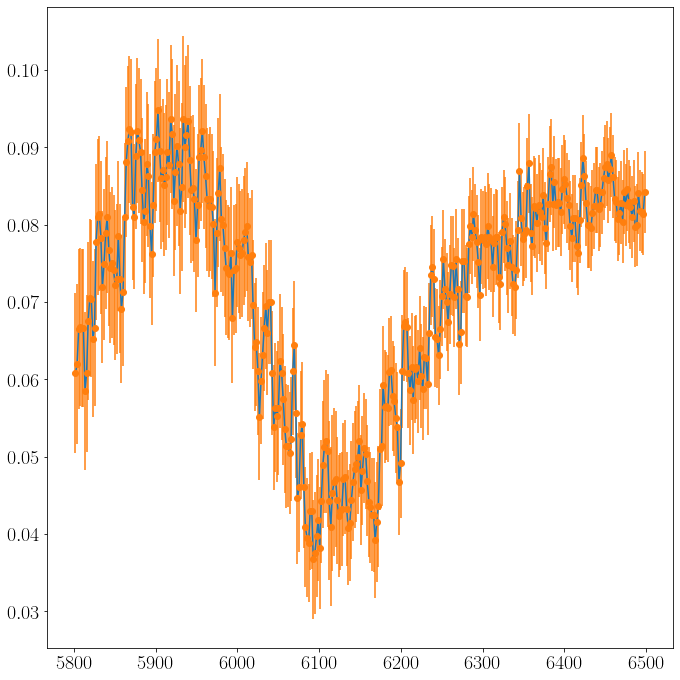

In [4]:
Spec1.plot_line_region(5800, 6500)

In [5]:
Spec1.add_line('SiII_6355', 5870, 6450, lines=[6371.359, 6347.103])

299 points within 5870.00 and 6450.00 angstroms.


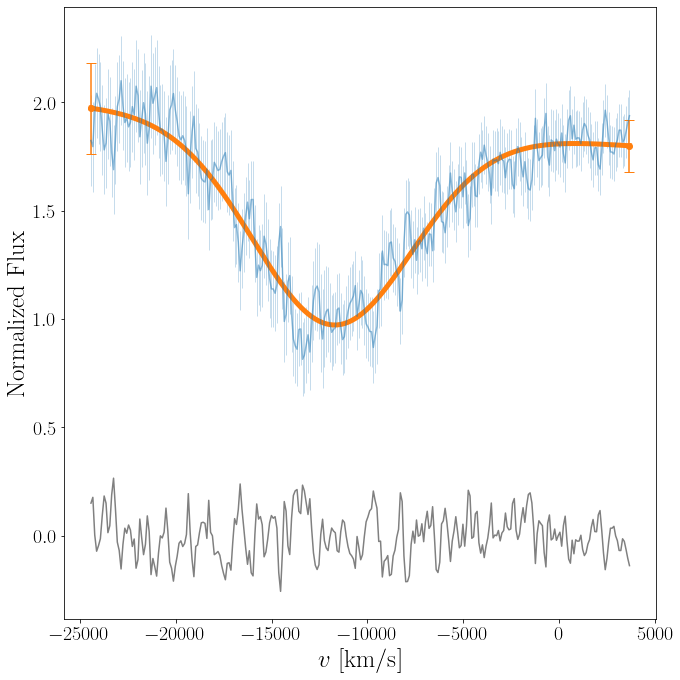

LS estimation:
Velocity pvf: -11251 km/s


In [6]:
Spec1.line['SiII_6355'].LS_estimator()

  0%|          | 2/50000 [00:00<47:29, 17.55it/s]

Normalize factor = 0.612


  8%|▊         | 4000/50000 [02:07<24:22, 31.45it/s]  


MCMC results:
Velocity pvf: -11248 pm 73 km/s


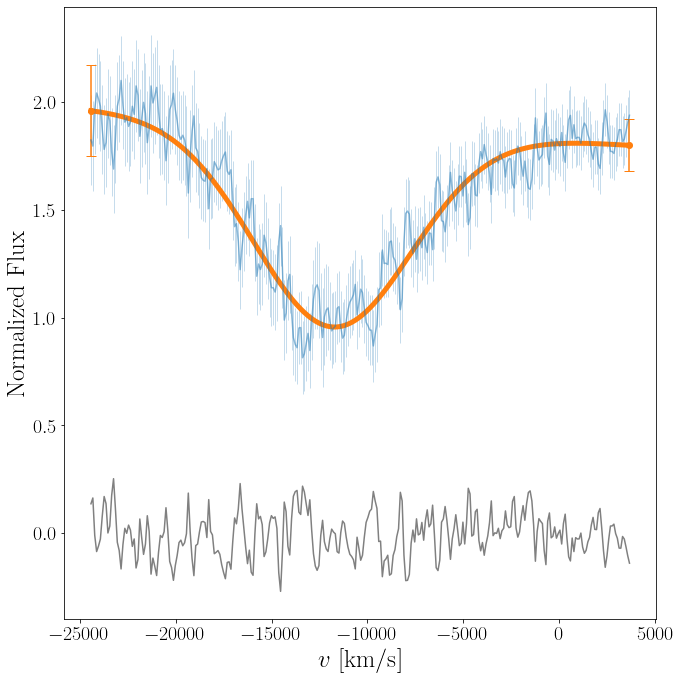

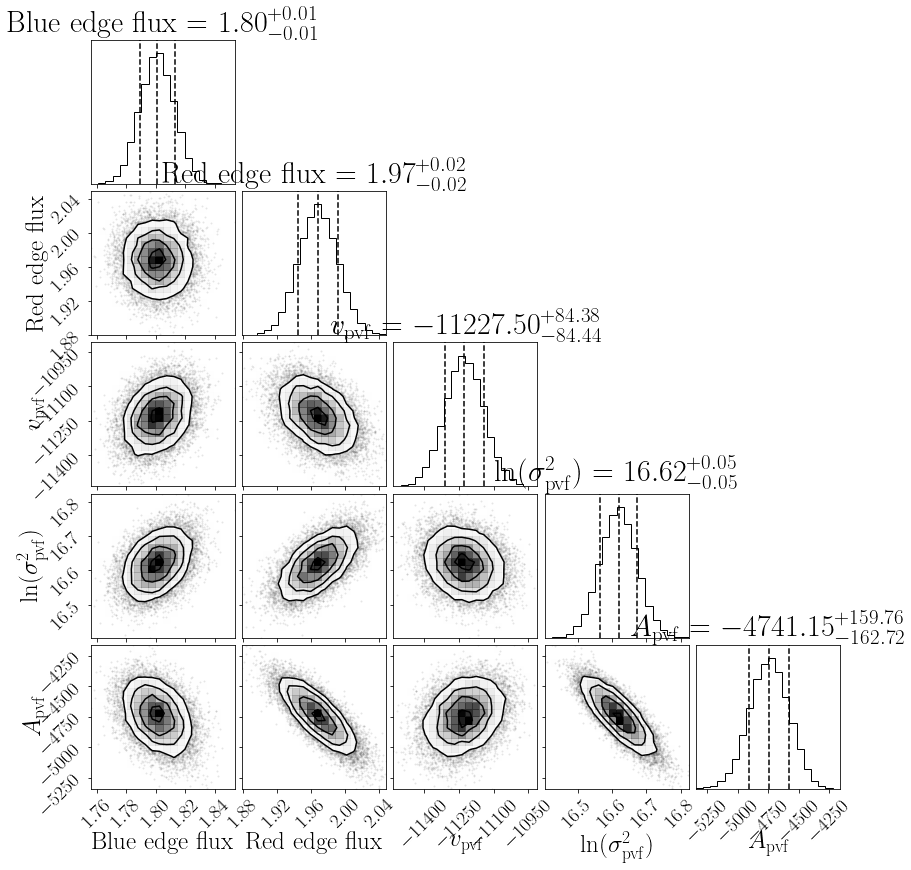

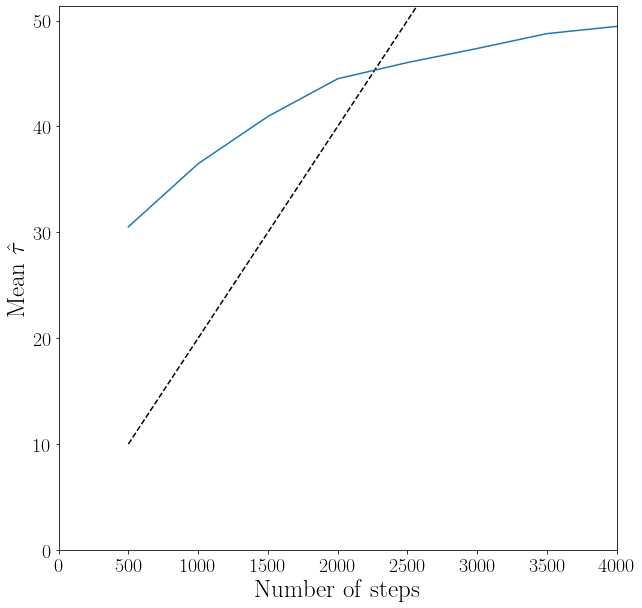

In [7]:
sampler = Spec1.line['SiII_6355'].MCMC_sampler(normalize_unc=True,
                                               Plot_mcmc=True,
                                               Plot_tau=True)

## Ca II IRT

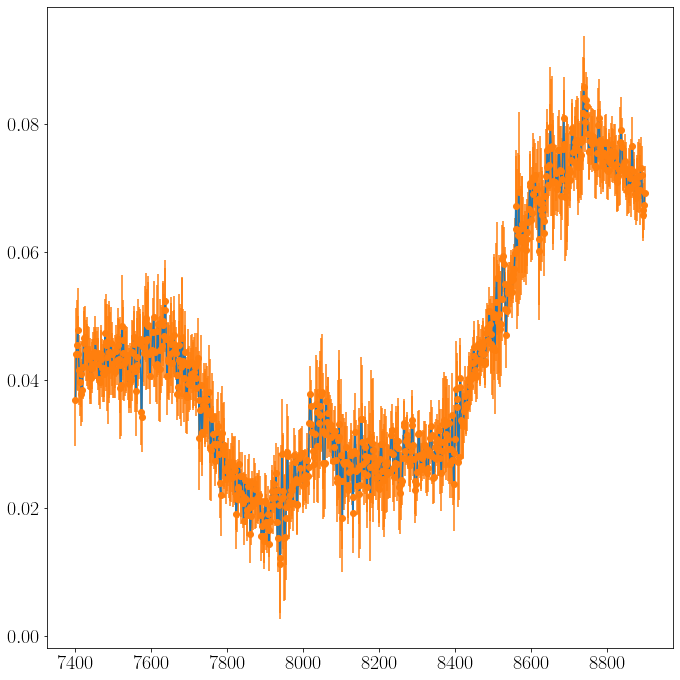

In [8]:
Spec1.plot_line_region(7400, 8900)

In [9]:
Spec1.add_line('CaII_IRT', 7580, 8790, lines=[8498.018, 8542.089, 8662.140])

623 points within 7580.00 and 8790.00 angstroms.


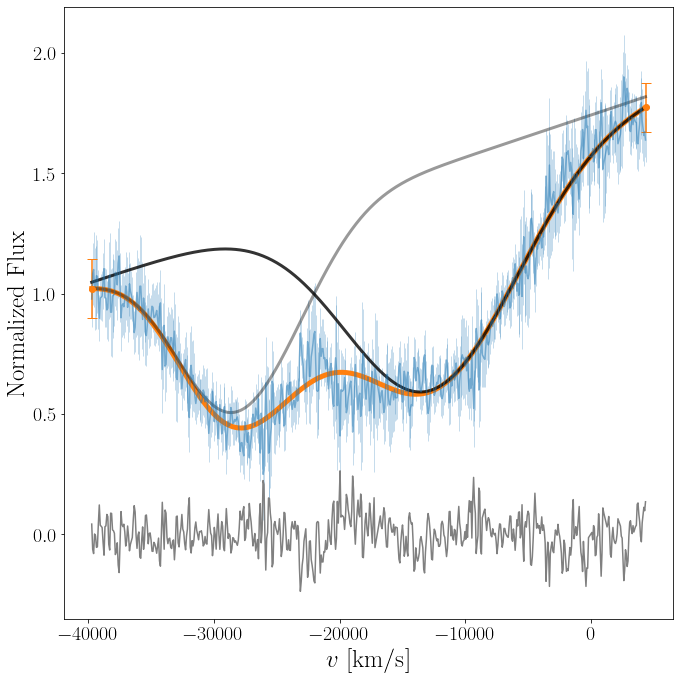

LS estimation:
Velocity pvf: -9289 km/s
Velocity hvf: -24487 km/s


In [10]:
Spec1.line['CaII_IRT'].LS_estimator(guess=(1, 1, -10000, 15, -1000, -25000, 15, -1000))

  0%|          | 2/1000 [00:00<00:55, 17.94it/s]

Normalize factor = 0.611


  0%|          | 2/50000 [00:00<46:16, 18.01it/s]

MCMC results:
Velocity pvf: -8557 pm 714 km/s
Velocity hvf: -24354 pm 254 km/s
Normalize factor = 0.611


 15%|█▌        | 7500/50000 [04:15<24:05, 29.39it/s]  


MCMC results:
Velocity pvf: -8788 pm 230 km/s
Velocity hvf: -24374 pm 149 km/s


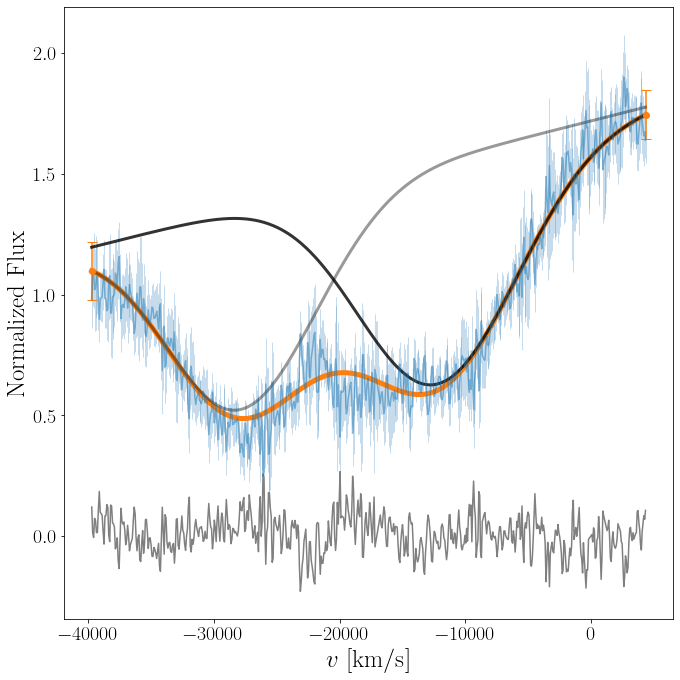

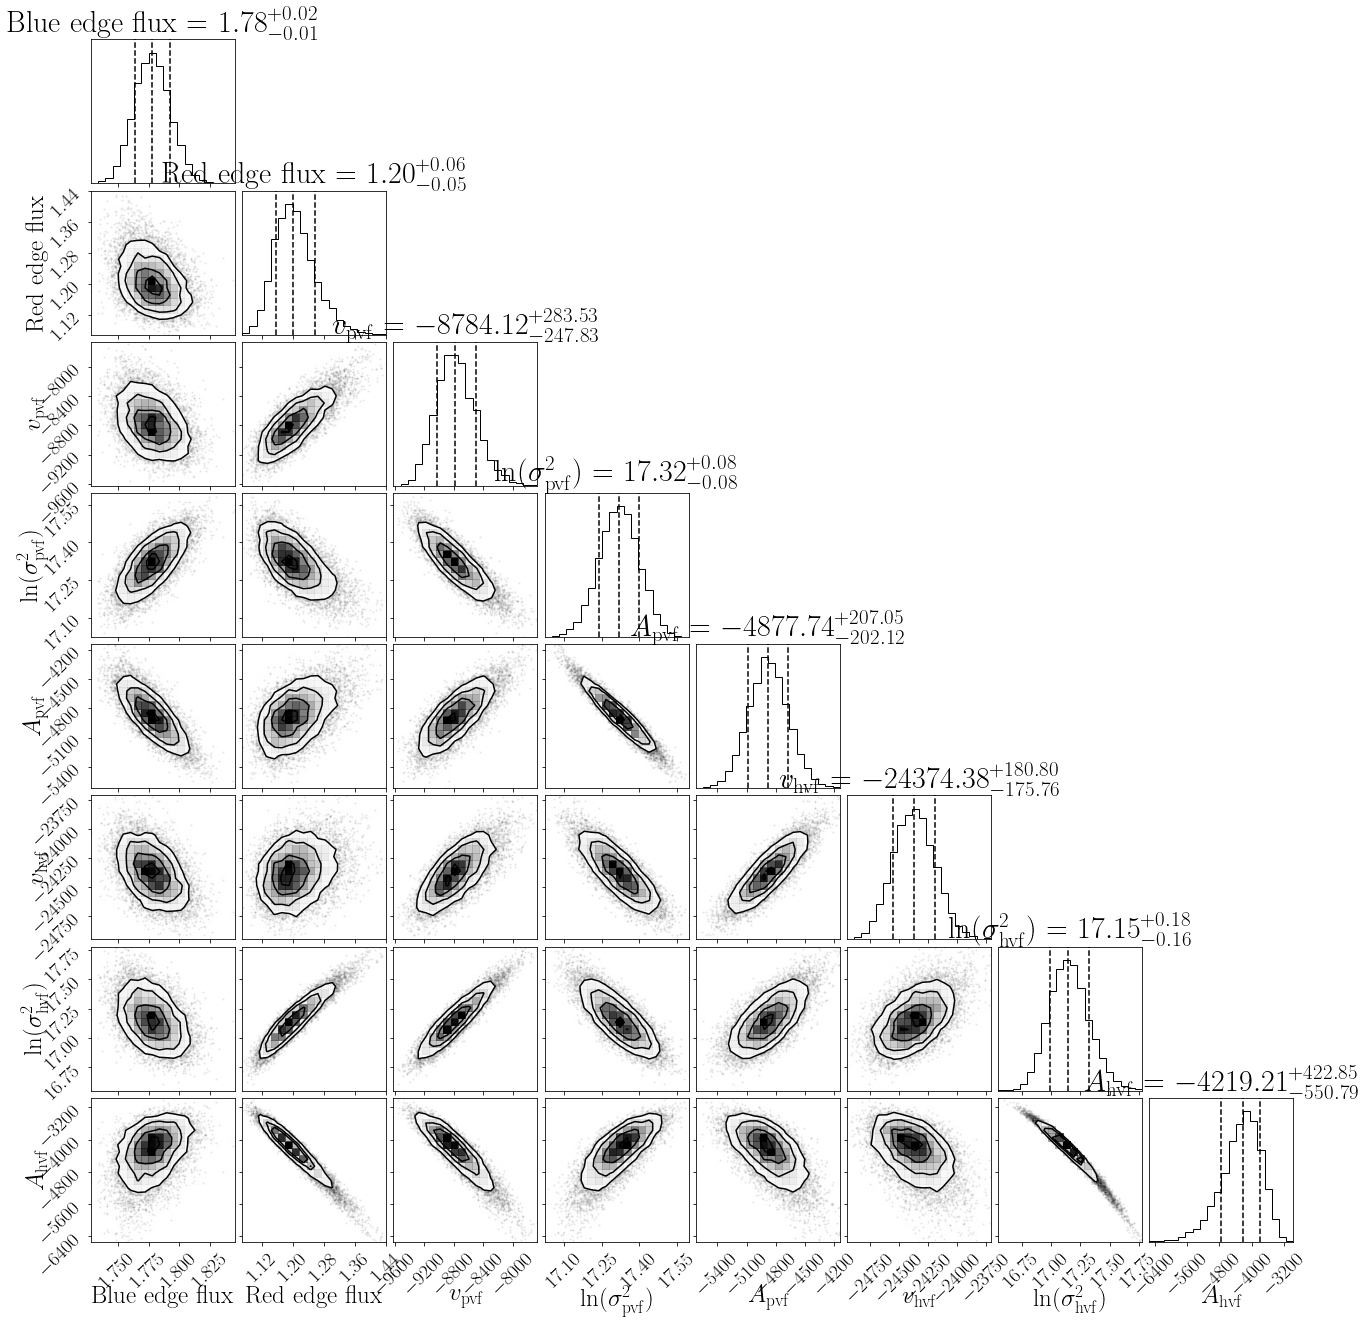

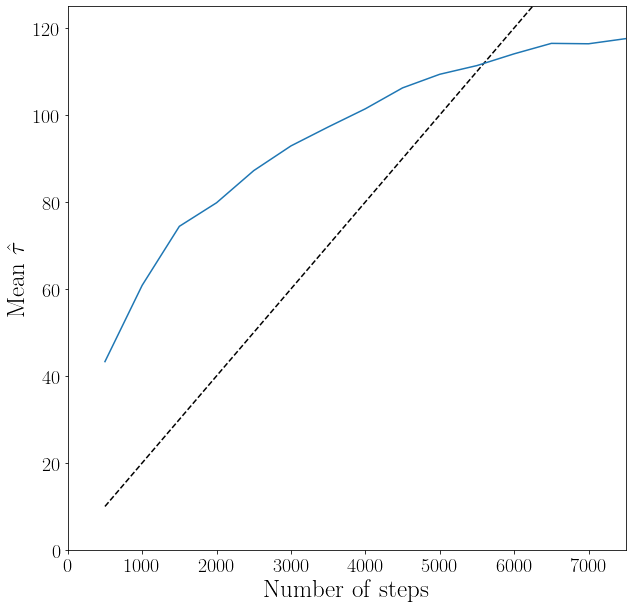

In [11]:
mu_pvf_prior = Spec1.line['SiII_6355'].theta_MCMC[2]
var_pvf_prior = 2e3**2
sampler = Spec1.line['CaII_IRT'].MCMC_sampler(mu_pvf=mu_pvf_prior,
                                              var_pvf=var_pvf_prior,
                                              initial=[1, 1, -12000, 15, -3000, -25000, 15, -2000],
                                              normalize_unc=True,
                                              max_nsteps=1000,
                                              Plot_model=False)
sampler = Spec1.line['CaII_IRT'].MCMC_sampler(
    mu_pvf=mu_pvf_prior,
    var_pvf=var_pvf_prior,
    initial=Spec1.line['CaII_IRT'].theta_MCMC,
    normalize_unc=True,
    Plot_mcmc=True,
    Plot_tau=True)